In [1]:
import os 

os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
WT_df = pd.read_csv('/home/jp4474/latent-abc-smc/data/BCELL/WT_imm_data.csv')
N2KO_df = pd.read_csv('/home/jp4474/latent-abc-smc/data/BCELL/N2KO_imm_data.csv')

In [3]:
# append WT and N2KO dataframes, have a column for genotype
WT_df['genotype'] = 'WT'
N2KO_df['genotype'] = 'N2KO'
df = pd.concat([WT_df, N2KO_df], ignore_index=True)

In [4]:
df

,days_post_imm,CARpos_totalB,CARpos_GCB,CARpos_FoB,CARpos_MZB,genotype
0,4,401148.37,2.640370e+04,175268.886217,25810.986049,WT
1,4,480277.44,1.358343e+05,152851.132006,47579.026686,WT
2,4,731478.60,1.317923e+05,229556.481840,74404.397302,WT
3,7,3212330.00,2.167096e+06,631170.034295,106472.677850,WT
4,7,4017357.80,3.131802e+06,607704.440892,116135.170307,WT
...,...,...,...,...,...,...
61,14,1287595.40,7.961791e+05,389729.940491,10228.772736,N2KO
62,14,1584407.44,8.118774e+05,661070.996641,13532.611671,N2KO
63,14,1916526.00,1.266755e+06,398198.817068,8471.269378,N2KO
64,14,3874317.40,2.696182e+06,836683.580080,19284.182531,N2KO


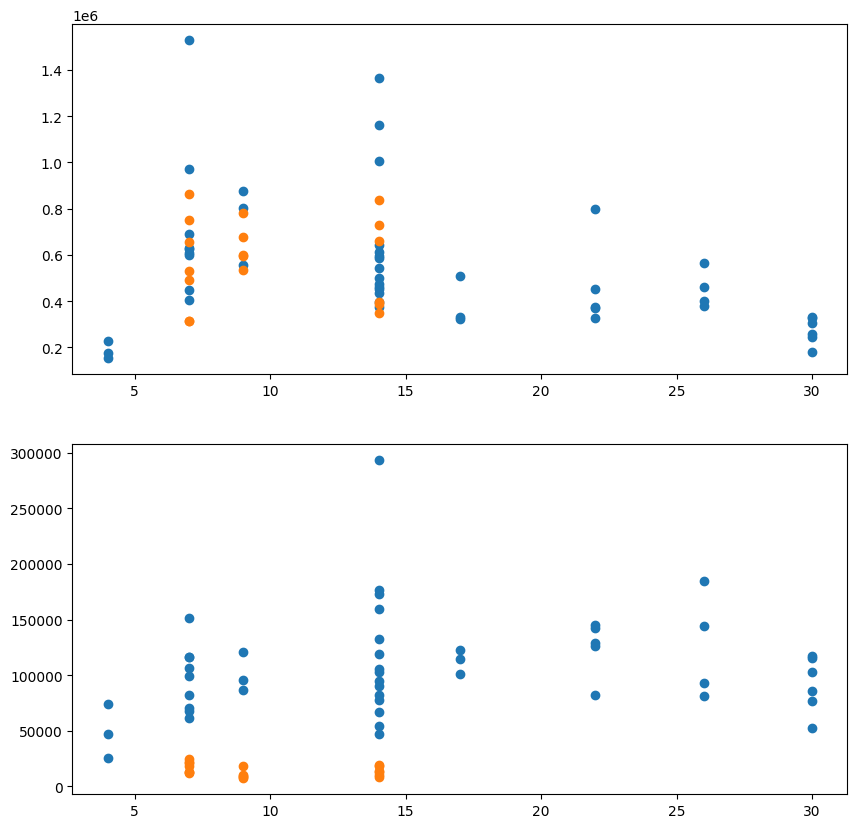

In [5]:
# plot the data, GCB and MZB cells by genotype by timepoint, separate scatter plots in 2 by 1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for genotype in df['genotype'].unique():
    subset = df[df['genotype'] == genotype]
    axs[0].scatter(subset['days_post_imm'], subset['CARpos_FoB'], label=f'{genotype} GCB', marker='o')
    axs[1].scatter(subset['days_post_imm'], subset['CARpos_MZB'], label=f'{genotype} MZB', marker='o')

In [6]:
observational_data = WT_df.groupby(['days_post_imm']).aggregate({'CARpos_FoB': 'mean', 'CARpos_MZB': 'mean'}).to_numpy()

In [7]:
WT_df = WT_df[['days_post_imm', 'CARpos_FoB', 'CARpos_MZB']].copy()
# Look up the mean at each timepoint and subtract it from the data
for i, timepoint in enumerate(WT_df['days_post_imm'].unique()):
    mean_FoB = observational_data[i, 0]
    mean_MZB = observational_data[i, 1]
    WT_df.loc[WT_df['days_post_imm'] == timepoint, 'CARpos_FoB'] -= mean_FoB
    WT_df.loc[WT_df['days_post_imm'] == timepoint, 'CARpos_MZB'] -= mean_MZB

In [8]:
# square the data
WT_df['CARpos_FoB'] = WT_df['CARpos_FoB'] ** 2
WT_df['CARpos_MZB'] = WT_df['CARpos_MZB'] ** 2

In [9]:
# calcualte the mean by timepoint
WT_df.groupby(['days_post_imm']).aggregate({'CARpos_FoB': 'mean', 'CARpos_MZB': 'mean'})

,CARpos_FoB,CARpos_MZB
days_post_imm,,
4,1.037045e+09,3.949742e+08
7,1.041364e+11,7.566412e+08
9,1.879405e+10,2.088441e+08
14,8.191966e+10,3.689137e+09
17,7.207995e+09,7.981342e+07
22,2.950190e+10,5.118024e+08
26,5.187722e+09,1.710116e+09
30,2.824119e+09,5.246949e+08


In [10]:
np.save('/home/jp4474/latent-abc-smc/data/BCELL/noisy_data.npy', observational_data)

In [13]:
observational_data / np.mean(observational_data, axis=0)

array([[0.38387481, 0.48000735],
       [1.4922416 , 0.94427732],
       [1.54141809, 0.98336274],
       [1.32135717, 1.15311278],
       [0.80016483, 1.10115427],
       [0.96107386, 1.21793951],
       [0.93335069, 1.22521876],
       [0.56651895, 0.89492726]])